In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})

%matplotlib inline

# Entendendo os dados
- Este notebook tem como objetivo entender as relações entre as variáveis e realizar uma Análise Exploratória deles.

## Arquivos
1. **agroclimatology.csv**: Este arquivo contém 38 colunas com dados climáticos de 349 municípios do estado do Paraná. Os dados são séries temporais (ou seja, as datas são os índices) de 2003 até 2020.
    
2. **produtividade_soja.csv**: Este arquivo contém a produtividade anual de soja por município de 2004 até 2017.

*Cada município possui um código IBGE que o identifica em ambas tabelas.* 


In [35]:
agroclimatology_df = pd.read_csv("agroclimatology.csv")
agroclimatology_df.head()

,data,codigo_ibge,latitude,longitude,T2M_RANGE,TS,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,...,GWETROOT,GWETPROF,ALLSKY_SFC_SW_DWN,CLRSKY_SFC_SW_DWN,TOA_SW_DWN,ALLSKY_SFC_PAR_TOT,CLRSKY_SFC_PAR_TOT,ALLSKY_SFC_UVA,ALLSKY_SFC_UVB,ALLSKY_SFC_UV_INDEX
0,20030101,4100103,-23.3049,-50.3133,12.71,26.83,21.08,23.77,33.15,20.43,...,0.64,0.68,23.50,30.53,42.75,129.63,165.10,17.95,0.57,2.99
1,20030102,4100103,-23.3049,-50.3133,8.32,25.83,22.34,24.15,29.98,21.65,...,0.65,0.68,18.79,29.75,42.74,104.59,160.21,14.59,0.47,2.46
2,20030103,4100103,-23.3049,-50.3133,6.22,23.68,21.30,22.49,27.04,20.82,...,0.66,0.68,15.68,29.39,42.72,88.91,157.65,12.41,0.41,2.11
3,20030104,4100103,-23.3049,-50.3133,5.24,23.37,21.51,22.42,25.91,20.67,...,0.69,0.70,13.71,28.99,42.69,78.73,155.84,11.04,0.34,1.79
4,20030105,4100103,-23.3049,-50.3133,8.83,24.48,21.58,22.94,29.21,20.38,...,0.70,0.70,15.15,29.28,42.66,85.01,155.69,11.80,0.37,1.91


In [4]:
productivity_df = pd.read_csv("produtividade_soja.csv")
productivity_df.head()

,nivel,codigo_ibge,name,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,MU,4100103,Abatiá,2600.0,1750.0,2100.0,2600.0,2600.0,2080.0,2590.0,3350.0,2320.0,3100.0,1460.0,2640.0,2760.0,3480.0
1,MU,4100459,Altamira do Paraná,3100.0,2460.0,2950.0,2950.0,2749.0,2749.0,3250.0,3200.0,2197.0,3223.0,3471.0,3099.0,2871.0,3818.0
2,MU,4100608,Alto Paraná,1487.0,1365.0,1734.0,2727.0,2400.0,1620.0,2899.0,2899.0,1737.0,2880.0,2000.0,1800.0,2221.0,2980.0
3,MU,4100707,Alto Piquiri,2300.0,2300.0,2700.0,3193.0,2701.0,2097.0,3130.0,3310.0,2000.0,3000.0,3192.0,3488.0,2589.0,3700.0
4,MU,4100509,Altônia,1050.0,1800.0,1255.0,2355.0,2600.0,1300.0,3000.0,2773.0,815.0,2137.0,1800.0,2455.0,2780.0,2900.0


Vamos ver qual ano teve maior produtividade:

In [5]:
years = ['2004', '2005', '2006', '2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017']
all_production = productivity_df[years].sum(axis = 0)

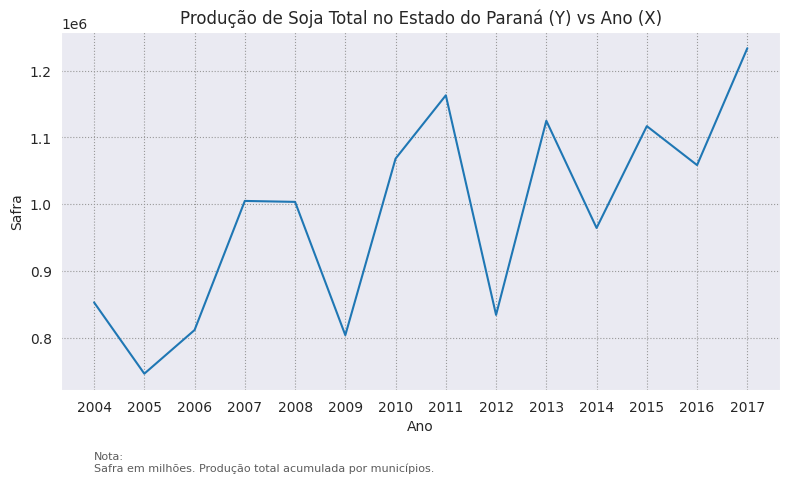

In [6]:
plt.figure(figsize=(8, 5))
plt.plot(years, all_production.values)

# Set plot title, caption and labels
plt.title('Produção de Soja Total no Estado do Paraná (Y) vs Ano (X)')
plt.text(x=0, y=0.6*1e6, s='Nota:\nSafra em milhões. Produção total acumulada por municípios.', fontsize=8, alpha=0.75)
plt.xlabel('Ano')
plt.ylabel('Safra')

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()

## Hipótese
- Vemos pelo gráfico acima que a produção tem uma tendência de crescimento. A produção deve aumentar devido a maiores investimentos, aplicação de defensivos agrícolas e condições climáticas. **Porém vemos que pontualmente temos variações em anos consecutivos (exemplo: 2011 vs 2012).**

Uma vez que temos apenas dados climáticos em nossas mãos, podemos comparar quais dados climáticos mais variaram de 2011 para 2012 e vamos supor que esta variação na produção ocorreu devido apenas a variação no clima.

### Plano
- Vamos selecionar um município qualquer e ver como a diferença de cada dado climático ocorreu. Os dados climáticos que apresentarem maior variação são os possíveis responsáveis pela variação na produção.
- Podemos utilizar também outros métodos estatísticos para ver como a informação da produtividade anual de soja varia com os dados climáticos, mas vamos optar pela primeira opção pela sua simplicidade e interpretabilidade.

### Como podemos confirmar nossa hipótese?
- Após selecionar os dados que mais variaram, podemos utilizá-los para serem as covariáveis de um modelo de predição da produção. Regredindo a produção na média anual de cada dimensão selecionada podemos ter uma ideia da sua importância na produtividade. Podemos também utilizar outro modelo para estudar como se dá essa relação entre clima vs produção.

In [7]:
''' Vamos comparar os dados climáticos do municipio de Abatia (codigo ibge = 4100103) de 2011 e 2012 '''

# Filtrar Abatia do dataframe com todos municipios
agroclim_abatia = agroclimatology_df[agroclimatology_df["codigo_ibge"] == 4100103]
# Transfomar a coluna de data em um objeto de data
agroclim_abatia["data"] = pd.to_datetime(agroclim_abatia["data"], format='%Y%m%d')
# Criando colunas para cada valor do dia, mes, ano e a data
agroclim_abatia["day"] = agroclim_abatia["data"].dt.day
agroclim_abatia["month"] = agroclim_abatia["data"].dt.month
agroclim_abatia["year"] = agroclim_abatia["data"].dt.year
agroclim_abatia["data"] = agroclim_abatia["data"].dt.date

/tmp/ipykernel_4728/1242619734.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  agroclim_abatia["data"] = pd.to_datetime(agroclim_abatia["data"], format='%Y%m%d')
/tmp/ipykernel_4728/1242619734.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  agroclim_abatia["day"] = agroclim_abatia["data"].dt.day
/tmp/ipykernel_4728/1242619734.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

In [8]:
abatia_df = agroclim_abatia.drop(columns=['codigo_ibge', 'latitude', 'longitude'])
abatia_df.describe().T

,count,mean,std,min,25%,50%,75%,max
T2M_RANGE,6575.0,11.706383,3.475728,2.41,9.270,11.71,14.150,22.78
TS,6575.0,21.059775,3.812548,5.87,18.400,21.77,23.950,31.35
T2MDEW,6575.0,16.118750,4.003367,-1.97,13.340,16.45,19.505,23.73
T2MWET,6575.0,18.560966,3.621327,3.36,16.150,19.09,21.610,24.87
T2M_MAX,6575.0,27.398774,3.858220,10.94,25.060,27.68,29.930,40.29
T2M_MIN,6575.0,15.692307,4.050443,-0.80,12.980,16.02,19.090,23.71
T2M,6575.0,21.003063,3.656714,6.16,18.580,21.65,23.785,30.50
QV2M,6575.0,12.533468,3.028309,3.48,10.190,12.45,15.140,19.78
RH2M,6575.0,76.785072,9.717156,37.44,70.750,77.81,83.880,97.19
PRECTOTCORR,6575.0,3.844730,7.751492,0.00,0.000,0.26,4.065,108.37


- **ALLSKY_SFC_UV_INDEX**: os valores negativos não estão na escala de index UV. Vamos transformar os dados menores que zero em 0 antes de prosseguir com a análise.

In [9]:
NUMERICAL_COLS = ['T2M_RANGE', 'TS', 'T2MDEW', 'T2MWET', 'T2M_MAX', 'T2M_MIN', 'T2M',
       'QV2M', 'RH2M', 'PRECTOTCORR', 'PS', 'WS2M', 'WS2M_MAX', 'WS2M_MIN',
       'WS2M_RANGE', 'WS10M', 'WS10M_MAX', 'WS10M_MIN', 'WS10M_RANGE', 'WS50M',
       'WS50M_MAX', 'WS50M_MIN', 'WS50M_RANGE', 'GWETTOP', 'GWETROOT',
       'GWETPROF', 'ALLSKY_SFC_SW_DWN', 'CLRSKY_SFC_SW_DWN', 'TOA_SW_DWN',
       'ALLSKY_SFC_PAR_TOT', 'CLRSKY_SFC_PAR_TOT', 'ALLSKY_SFC_UVA',
       'ALLSKY_SFC_UVB', 'ALLSKY_SFC_UV_INDEX']

DATE_COLS = ['data', 'day', 'month', 'year']

abatia_2011 = abatia_df[abatia_df['year'] == 2011]
abatia_2011.reset_index(inplace=True)
# Ajustando os valores index UV para a escala correta
abatia_2011.loc[abatia_2011['ALLSKY_SFC_UV_INDEX'] < 0, 'ALLSKY_SFC_UV_INDEX'] = 0 

abatia_2012 = abatia_df[abatia_df['year'] == 2012]
abatia_2012.reset_index(inplace=True)
#  Ajustando os valores index UV para a escala correta
abatia_2012.loc[abatia_2012['ALLSKY_SFC_UV_INDEX'] < 0, 'ALLSKY_SFC_UV_INDEX'] = 0

# Dataset com as diferenças de cada ano
delta_abatia = abatia_2012[NUMERICAL_COLS] - abatia_2011[NUMERICAL_COLS]

In [10]:
delta_abatia.describe().T

,count,mean,std,min,25%,50%,75%,max
T2M_RANGE,365.0,0.461260,4.767593,-13.52,-2.62,0.52,4.21,11.09
TS,365.0,1.167370,3.402331,-9.73,-0.72,1.07,3.55,12.42
T2MDEW,365.0,0.212685,4.156527,-10.44,-2.53,-0.35,2.42,15.15
T2MWET,365.0,0.646685,3.349863,-8.47,-1.35,0.53,2.64,11.80
T2M_MAX,365.0,1.310630,4.640693,-13.92,-1.68,1.75,4.60,14.44
T2M_MIN,365.0,0.849014,3.836688,-11.08,-1.55,0.82,3.22,13.01
T2M,365.0,1.080466,3.412199,-8.86,-0.78,1.10,3.31,12.35
QV2M,365.0,0.032986,3.004620,-7.75,-2.02,-0.25,1.77,8.06
RH2M,365.0,-3.084685,13.536846,-33.50,-12.69,-3.44,6.56,32.37
PRECTOTCORR,365.0,-0.349726,10.345170,-66.51,-1.95,0.00,1.35,82.99


- O sumário acima temos uma descrição das variações de cada variável de 2012 versus 2011. Vamos focar nos valores da disperção de cada distribuição de diferenças (**std**) e a amplitude (3º quartil: **75%**, para sermos menos sensíveis a outliers).

In [44]:
delta_abatia.describe().T[['std', '75%']].sort_values(by=['std', '75%'], ascending=False)[:10]

,std,75%
ALLSKY_SFC_PAR_TOT,38.786218,24.63
RH2M,13.536846,6.56
PRECTOTCORR,10.345170,1.35
ALLSKY_SFC_SW_DWN,7.813414,5.00
CLRSKY_SFC_PAR_TOT,6.113889,3.61
T2M_RANGE,4.767593,4.21
ALLSKY_SFC_UVA,4.748514,2.83
T2M_MAX,4.640693,4.60
T2MDEW,4.156527,2.42
T2M_MIN,3.836688,3.22


A tabela acima mostra as 10 variáveis que mais variaram e tiveram uma maior distancia entre valores não raros nos anos de 2011 (max) e 2012 (min):

- ALLSKY_SFC_PAR_TOT - All Sky Surface PAR Total (?? Photosynthetically Active Radiation (PAR) ???)
- RH2M - Relative Humidity at 2 Meters
- PRECTOTCORR - Precipitation Corrected
- ALLSKY_SFC_SW_DWN - All Sky Surface Shortwave Downward Irradiance
- ALLSKY_SFC_PAR_TOT- All Sky Surface PAR Total
- T2M_RANGE - Temperature at 2 Meters Range
- ALLSKY_SFC_UVA - All Sky Surface UVA Irradiance
- T2M_MAX - Temperature at 2 Meters Maximum
- T2MDEW - Dew/Frost Point at 2 Meters
- T2M_MIN - Temperature at 2 Meters Minimum


Vamos visualizar como seus valores estão distribuídos e como eles se comportam temporalmente...

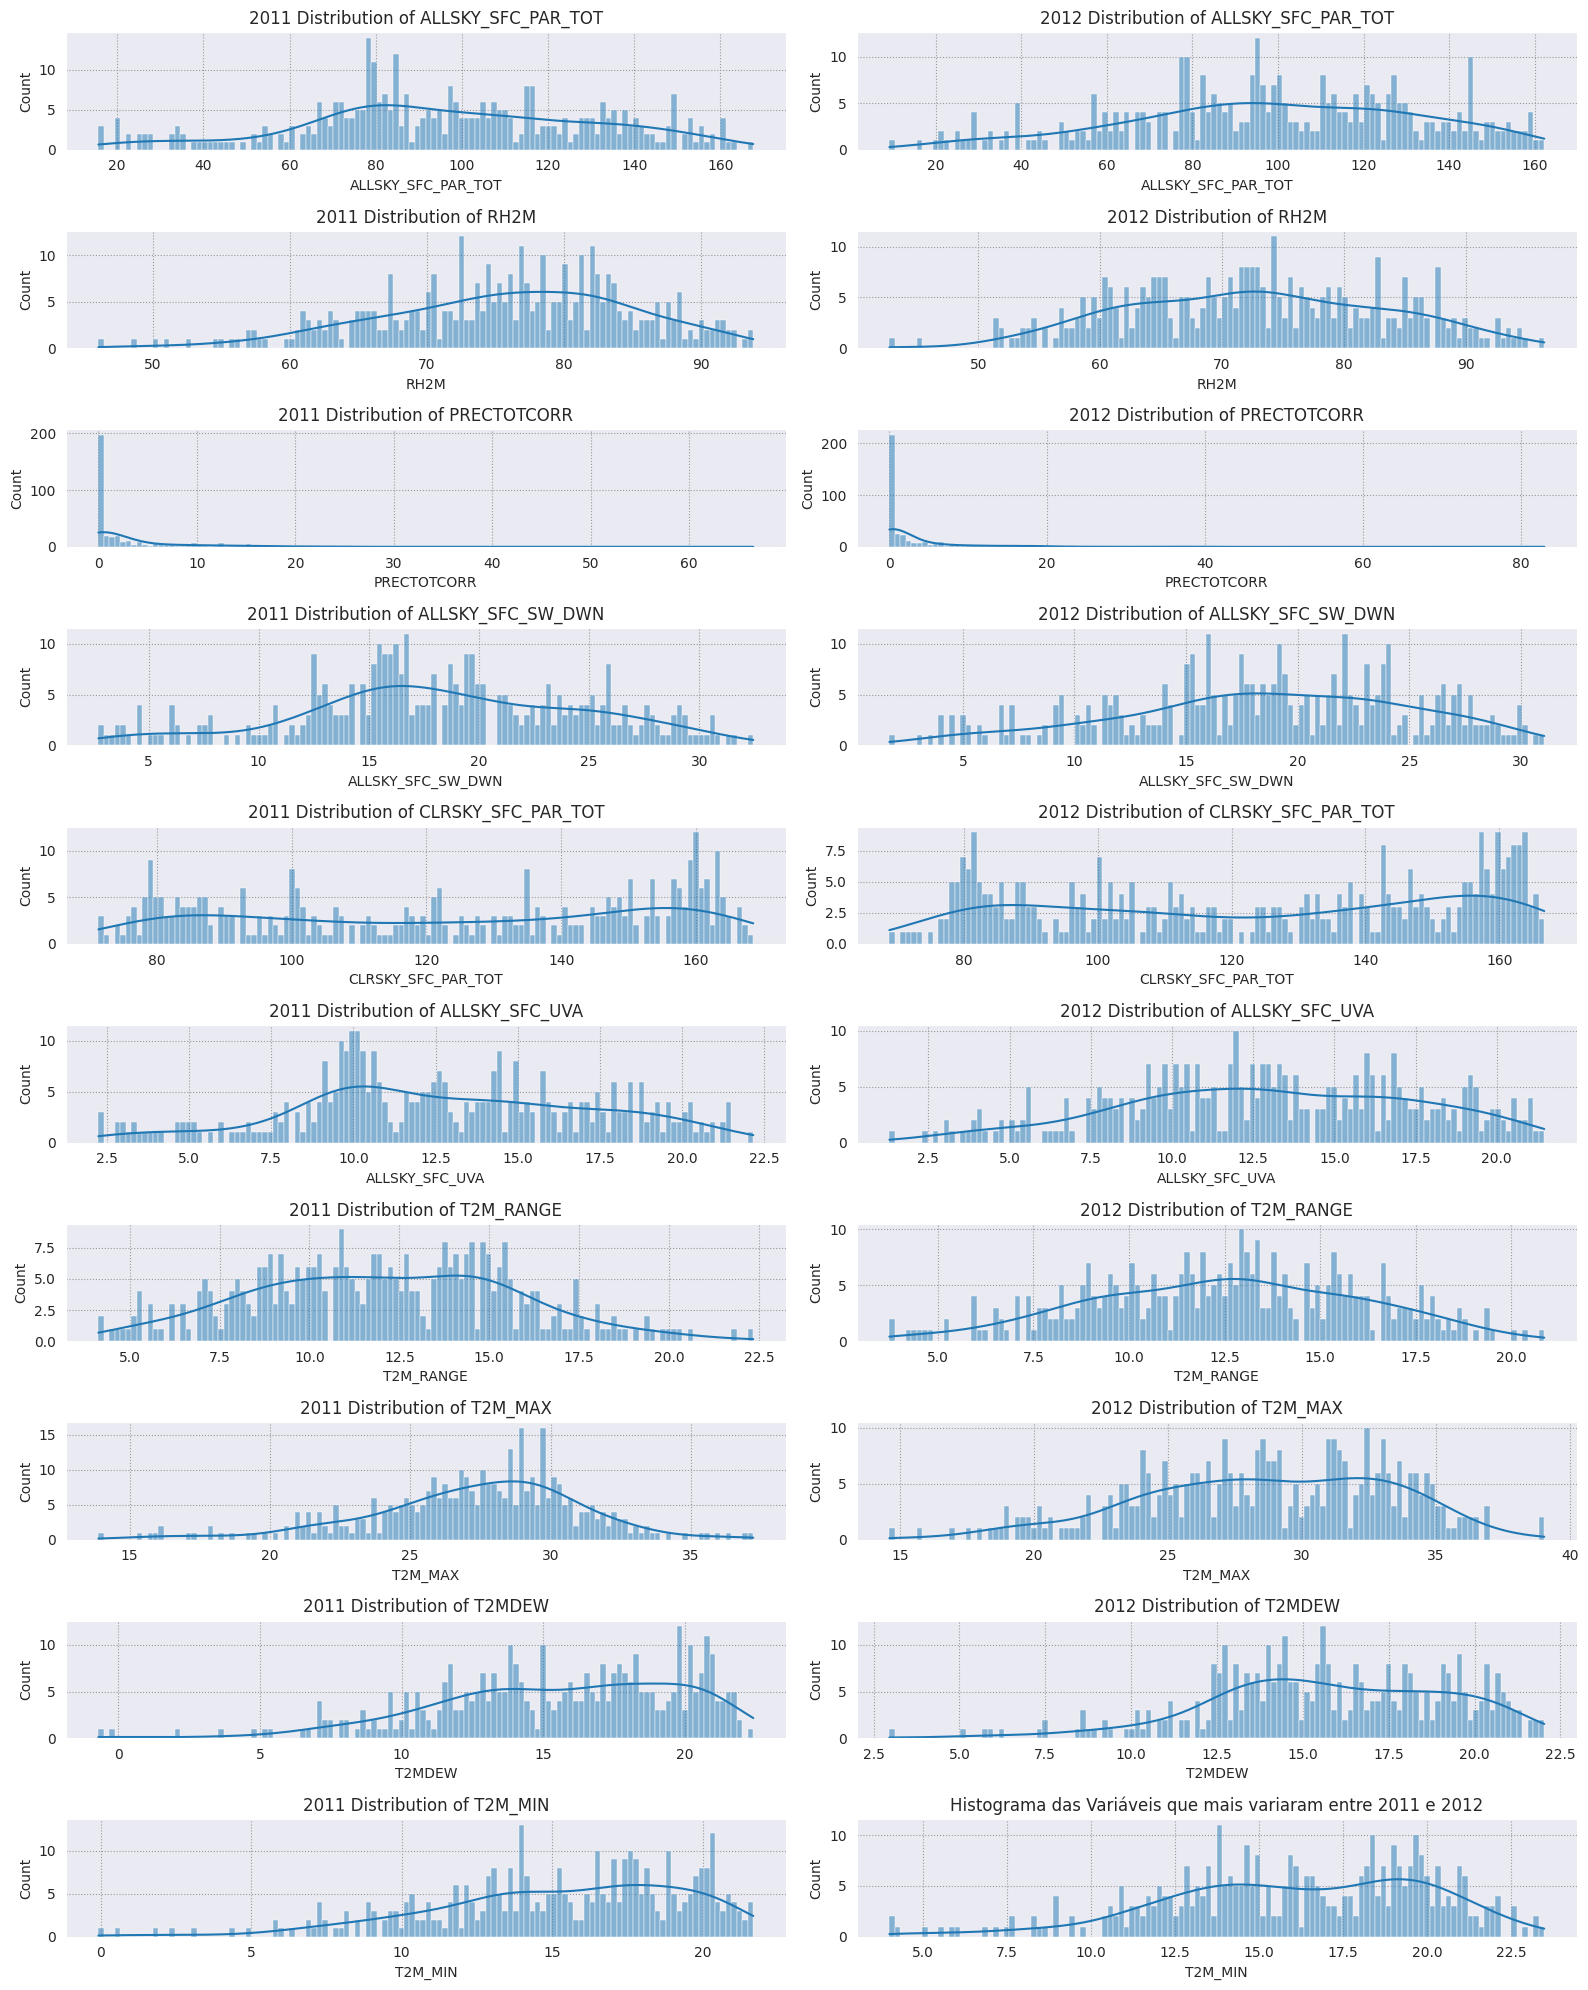

In [12]:
# Histograma das Variáveis que mais variaram entre 2011 e 2012

RELEVANT_COLS = ['ALLSKY_SFC_PAR_TOT', 'RH2M', 'PRECTOTCORR', 'ALLSKY_SFC_SW_DWN', 'CLRSKY_SFC_PAR_TOT',
                 'ALLSKY_SFC_UVA', 'T2M_RANGE', 'T2M_MAX', 'T2MDEW', 'T2M_MIN']

# Criando os gráficos de distribuição para cada variável
fig, axes = plt.subplots(10, 2, figsize=(16, 20))

for i, var in enumerate(RELEVANT_COLS):
    sns.histplot(data=abatia_2011[var], kde=True, bins=120, ax=axes[i, 0])
    axes[i, 0].set_title(f'2011 Distribution of {var}')

for i, var in enumerate(RELEVANT_COLS):
    sns.histplot(data=abatia_2012[var], kde=True, bins=120, ax=axes[i, 1])
    axes[i, 1].set_title(f'2012 Distribution of {var}')

plt.tight_layout()

plt.show()

/tmp/ipykernel_4728/888600183.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  abatia_2011[ma_col] = abatia_2011[var].rolling(window=window_size).mean()
/tmp/ipykernel_4728/888600183.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  abatia_2012[ma_col] = abatia_2012[var].rolling(window=window_size).mean()
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/tmp/ipykernel_4728/888600183.py:8: Setting

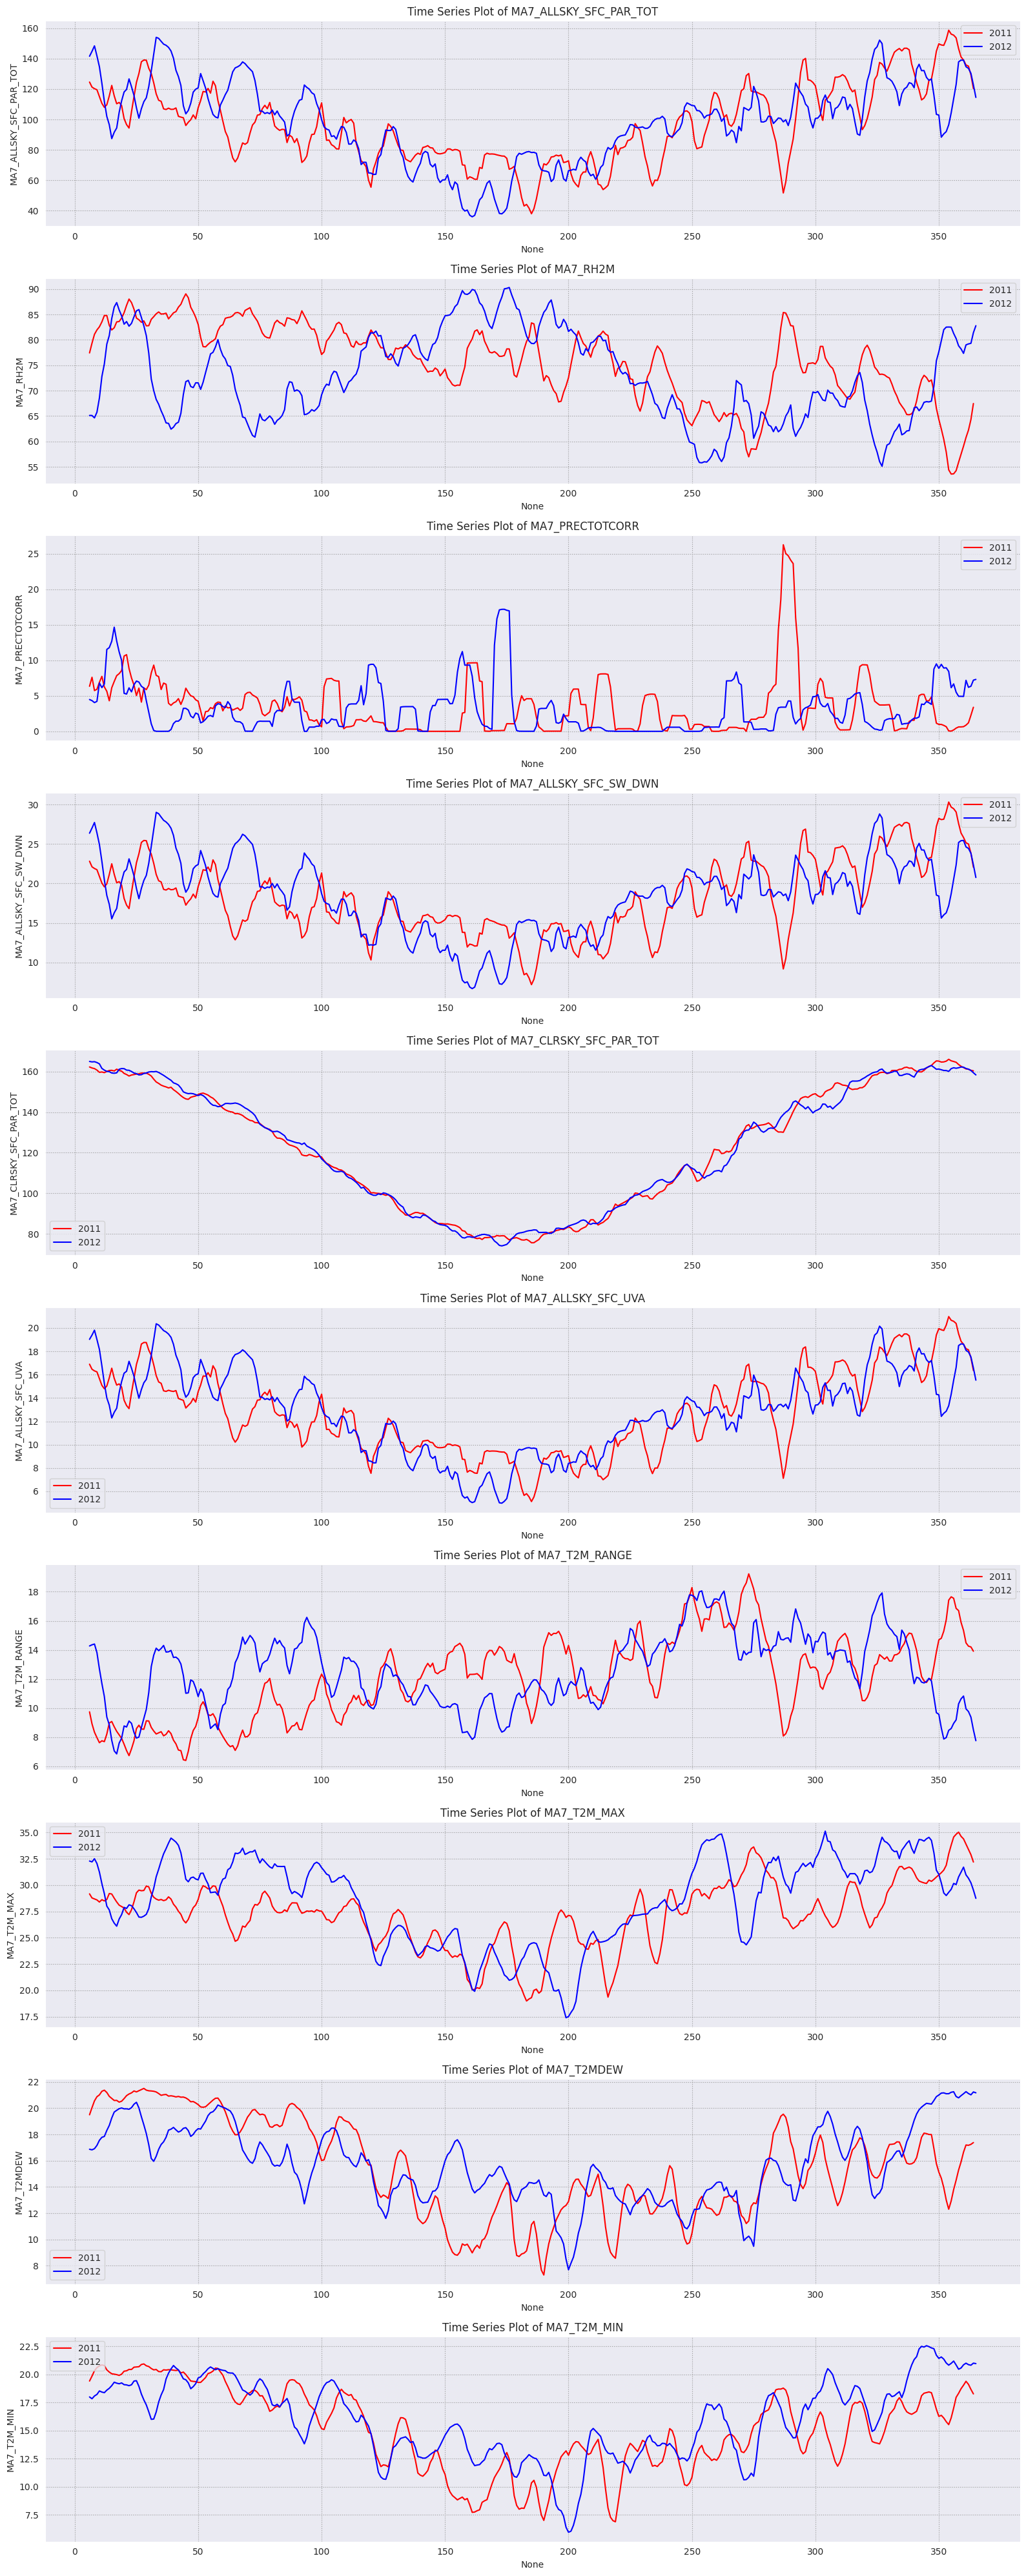

In [72]:
# Viaualizando os valores temporais (a Média Móvel de 7 dias) dos dois anos selecionados temos
window_size = 7
fig, axes = plt.subplots(10, 1, figsize=(16, 40))

for i, var in enumerate(RELEVANT_COLS):
    ma_col = 'MA7_' + var
    
    abatia_2011[ma_col] = abatia_2011[var].rolling(window=window_size).mean()
    abatia_2012[ma_col] = abatia_2012[var].rolling(window=window_size).mean()

    sns.lineplot(data=abatia_2011, x=abatia_2011.index, y=ma_col, ax=axes[i], color="red", label="2011")
    sns.lineplot(data=abatia_2012, x=abatia_2012.index, y=ma_col, ax=axes[i], color="blue", label="2012")
    axes[i].set_title(f'Time Series Plot of MA7_{var}')
    plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

- Dos gráficos vemos que **CLRSKY_SFC_PAR_TOT**, não apresenta grandes diferenças visuais entre 2011 e 2012 (tanto no histograma como na evolução da série temporal). Vamos prosseguir a análise utilizando apenas as colunas: `['ALLSKY_SFC_PAR_TOT', 'RH2M', 'PRECTOTCORR', 'ALLSKY_SFC_SW_DWN', 'ALLSKY_SFC_UVA', 'T2M_RANGE', 'T2M_MAX', 'T2MDEW', 'T2M_MIN']` como variáveis explicatórias da produção de soja.

- Para confirmar a nossa hipótese vamos prosseguir com uma regressão linear da produção de soja nessas variáveis. Contudo, temos um problema: apenas possuímos a produção de soja anual por muncípio e os dados climáticos são diários (a escala de tempo não é a mesma). Para simplificar a análise podemos sumarizar a distribuição diária para um valor (média anual, mediana). Parte da informação será perdida ao realizar tal decisão, mas a interpretabilidade do modelo e as relações serão mais facilmente interpretadas por nós.

In [16]:
productivity_df.head()

,nivel,codigo_ibge,name,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,MU,4100103,Abatiá,2600.0,1750.0,2100.0,2600.0,2600.0,2080.0,2590.0,3350.0,2320.0,3100.0,1460.0,2640.0,2760.0,3480.0
1,MU,4100459,Altamira do Paraná,3100.0,2460.0,2950.0,2950.0,2749.0,2749.0,3250.0,3200.0,2197.0,3223.0,3471.0,3099.0,2871.0,3818.0
2,MU,4100608,Alto Paraná,1487.0,1365.0,1734.0,2727.0,2400.0,1620.0,2899.0,2899.0,1737.0,2880.0,2000.0,1800.0,2221.0,2980.0
3,MU,4100707,Alto Piquiri,2300.0,2300.0,2700.0,3193.0,2701.0,2097.0,3130.0,3310.0,2000.0,3000.0,3192.0,3488.0,2589.0,3700.0
4,MU,4100509,Altônia,1050.0,1800.0,1255.0,2355.0,2600.0,1300.0,3000.0,2773.0,815.0,2137.0,1800.0,2455.0,2780.0,2900.0


In [20]:
cols = ['codigo_ibge', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017']
y = pd.melt(productivity_df[cols], id_vars=['codigo_ibge'], var_name='year', value_name='productivity')
y.head()

,codigo_ibge,year,productivity
0,4100103,2004,2600.0
1,4100459,2004,3100.0
2,4100608,2004,1487.0
3,4100707,2004,2300.0
4,4100509,2004,1050.0


In [53]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4886 entries, 0 to 4885
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   codigo_ibge   4886 non-null   int64  
 1   year          4886 non-null   object 
 2   productivity  4886 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 114.6+ KB


In [56]:
y.year = y.year.astype(int)

In [48]:
cols = ['ALLSKY_SFC_PAR_TOT', 'RH2M', 'PRECTOTCORR', 'ALLSKY_SFC_SW_DWN', 'ALLSKY_SFC_UVA', 'T2M_RANGE', 'T2M_MAX', 'T2MDEW', 'T2M_MIN']
agroclimatology_df["data"] = pd.to_datetime(agroclimatology_df["data"], format='%Y%m%d')
agroclimatology_df["year"] = agroclimatology_df["data"].dt.year
X = (
    agroclimatology_df[(agroclimatology_df.year >= 2004) & (agroclimatology_df.year <= 2017)]
        [["year", "codigo_ibge"] + cols]
        .groupby(["year", "codigo_ibge"])
        .mean() # Mude essa alinha para agregar os dados com outra estatistica (mediana, por exemplo)
        .reset_index()
)

In [49]:
X

,year,codigo_ibge,ALLSKY_SFC_PAR_TOT,RH2M,PRECTOTCORR,ALLSKY_SFC_SW_DWN,ALLSKY_SFC_UVA,T2M_RANGE,T2M_MAX,T2MDEW,T2M_MIN
0,2004,4100103,95.921639,77.209563,3.793443,18.217459,12.615137,11.718115,26.803716,15.675109,15.084891
1,2004,4100459,95.910765,80.495710,4.880383,18.309536,12.584891,10.148197,24.952514,15.555874,14.804809
2,2004,4100509,98.059590,76.400055,4.166503,18.604508,12.771776,11.727295,28.341831,17.034945,16.614208
3,2004,4100608,97.531585,76.130109,3.892295,18.504372,12.735683,11.997104,28.528197,16.717814,16.531230
4,2004,4100707,96.342486,76.400055,4.166503,18.349290,12.585082,11.727295,28.341831,17.034945,16.614208
...,...,...,...,...,...,...,...,...,...,...,...
4881,2017,4128534,99.482219,75.577973,4.841342,18.648959,13.077068,11.476466,28.979562,17.537425,17.503068
4882,2017,4128559,99.482219,75.577973,4.841342,18.648959,13.077068,11.476466,28.979562,17.537425,17.503068
4883,2017,4128609,99.482219,75.577973,4.841342,18.648959,13.077068,11.476466,28.979562,17.537425,17.503068
4884,2017,4128658,99.482219,75.577973,4.841342,18.648959,13.077068,11.476466,28.979562,17.537425,17.503068


In [54]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4886 entries, 0 to 4885
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   year                4886 non-null   int32  
 1   codigo_ibge         4886 non-null   int64  
 2   ALLSKY_SFC_PAR_TOT  4886 non-null   float64
 3   RH2M                4886 non-null   float64
 4   PRECTOTCORR         4886 non-null   float64
 5   ALLSKY_SFC_SW_DWN   4886 non-null   float64
 6   ALLSKY_SFC_UVA      4886 non-null   float64
 7   T2M_RANGE           4886 non-null   float64
 8   T2M_MAX             4886 non-null   float64
 9   T2MDEW              4886 non-null   float64
 10  T2M_MIN             4886 non-null   float64
dtypes: float64(9), int32(1), int64(1)
memory usage: 400.9 KB


In [60]:
final_df = pd.merge(X, y, on=["year", "codigo_ibge"], how='inner')
final_df

,year,codigo_ibge,ALLSKY_SFC_PAR_TOT,RH2M,PRECTOTCORR,ALLSKY_SFC_SW_DWN,ALLSKY_SFC_UVA,T2M_RANGE,T2M_MAX,T2MDEW,T2M_MIN,productivity
0,2004,4100103,95.921639,77.209563,3.793443,18.217459,12.615137,11.718115,26.803716,15.675109,15.084891,2600.0
1,2004,4100459,95.910765,80.495710,4.880383,18.309536,12.584891,10.148197,24.952514,15.555874,14.804809,3100.0
2,2004,4100509,98.059590,76.400055,4.166503,18.604508,12.771776,11.727295,28.341831,17.034945,16.614208,1050.0
3,2004,4100608,97.531585,76.130109,3.892295,18.504372,12.735683,11.997104,28.528197,16.717814,16.531230,1487.0
4,2004,4100707,96.342486,76.400055,4.166503,18.349290,12.585082,11.727295,28.341831,17.034945,16.614208,2300.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4881,2017,4128534,99.482219,75.577973,4.841342,18.648959,13.077068,11.476466,28.979562,17.537425,17.503068,3579.0
4882,2017,4128559,99.482219,75.577973,4.841342,18.648959,13.077068,11.476466,28.979562,17.537425,17.503068,3750.0
4883,2017,4128609,99.482219,75.577973,4.841342,18.648959,13.077068,11.476466,28.979562,17.537425,17.503068,3720.0
4884,2017,4128658,99.482219,75.577973,4.841342,18.648959,13.077068,11.476466,28.979562,17.537425,17.503068,3600.0


In [67]:
import statsmodels.api as sm

x_ = final_df[cols]
y_ = final_df.productivity

# Add a constant to the feature matrix for the intercept term (bias)
x_ = sm.add_constant(x_)

# Fit the linear regression model
model = sm.OLS(y_, x_)
results = model.fit()

# Print summary
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           productivity   R-squared:                       0.172
Model:                            OLS   Adj. R-squared:                  0.171
Method:                 Least Squares   F-statistic:                     112.8
Date:                Sun, 07 Apr 2024   Prob (F-statistic):          7.65e-193
Time:                        12:47:57   Log-Likelihood:                -37868.
No. Observations:                4886   AIC:                         7.576e+04
Df Residuals:                    4876   BIC:                         7.582e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               6002.1367   1606.205      3.737      0.000    2853.250    9151.023
ALLSKY_SFC_PAR_TOT   -30.3648     25.861     -1.174      0.240     -81.065      20.335
RH2M                 -39.4038     16.081     -2.450      0.014     -70.930      -7.877
PRECTOTCORR         -111.8589     22.712     -4.925      0.000    -156.385     -67.333
ALLSKY_SFC_SW_DWN   -118.3896     90.800     -1.304      0.192    -296.398      59.619
ALLSKY_SFC_UVA       502.1834    128.248      3.916      0.000     250.760     753.607
T2M_RANGE          -6.745e+04   2.48e+04     -2.715      0.007   -1.16e+05   -1.87e+04
T2M_MAX             6.725e+04   2.48e+04      2.707      0.007    1.85e+04    1.16e+05
T2MDEW               527.2080     69.362      7.601      0.000     391.228     663.188
T2M_MIN             -6.77e+04   2.48e+04     -2.725      0.006   -1.16e+05    -1.9e+04
==============================================================================
Omnibus:                      335.179   Durbin-Watson:                   1.219
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              502.147
Skew:                          -0.564   Prob(JB):                    9.12e-110
Kurtosis:                       4.093   Cond. No.                     6.90e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.9e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""


## Conclusão
- Pelos resultados acima, vemos que as colunas ALLSKY_SFC_UVA, T2M_MAX e T2MDEW são as mais responsáveis por um aumento na produtividade de soja (em média com uma boa evidência estatística) devido ao coeficiente maior que zero. Devido ao alto valor do coeficiente e o grau de confiabilidade, essas variávies tem uma relação bem forte com a produção de soja.

- COm respeito as colunas ALLSKY_SFC_PAR_TOT e ALLSKY_SFC_SW_DWN, não  podemos concluir nada devida a alta variância de seus valores (não há uma relação linear entre essas colunas e a produtividade de soja).

- As demais apresentam, em geral uma força contrária na produção de soja

## Próximos passos
- Testar outros modelos (dica: [Lazy Predict](https://lazypredict.readthedocs.io/en/stable/readme.html#usage)), realizar o sumário da distribuição diária de dados climáticos por outras estatísticas e repetir o modelo linear (e também outros modelos), entender o que são as variáveis que apresentaram uma relação positiva com a produção de soja.